### Import packages-libraries

In [1]:
import pandas as pd
import numpy as np

import urllib3
import requests
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from nltk.stem.porter import *
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
import nltk

nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Read from file

In [2]:
train_data = pd.read_csv('datasets/q1/train.csv', sep=',')
test_data = pd.read_csv('datasets/q1/test_without_labels.csv', sep=',')
#test_data['Label'] = train_data['Label']
expected_array = np.array(train_data.head(2000)[['Label']]).flatten()
content_array = np.array(train_data.head(2000)[['Content']]).flatten()
#X_train = train_data['Content'].head(2000)
#Y_train = train_data['Label'].head(2000)
#X_test = test_data['Content']
#Y_test = test_data['Label']

my_additional_stop_words = ['said','still','day','will','new','may','two','one','now','time','say','second','month','first','going','year','back','people','case','according']
stop_words = STOPWORDS.union(my_additional_stop_words)

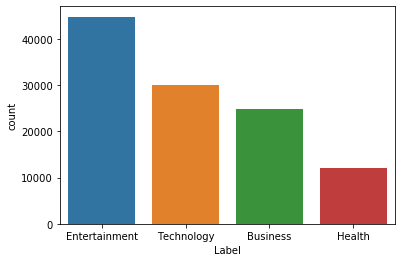

In [3]:
sns.countplot(x='Label',data=train_data)

In [4]:
traindata = train_data.groupby('Label').count()
print(traindata)

                  Id  Title  Content
Label                               
Business       24834  24834    24834
Entertainment  44834  44834    44834
Health         12020  12020    12020
Technology     30107  30107    30107


### Cleaning Data

In [3]:
#df_entertainment = train_data[train_data['Label']=='Entertainment'].head(3900)
#df_health = train_data[train_data['Label']=='Health'].head(1200)
#df_business = train_data[train_data['Label']=='Business'].head(2700)
#df_technology = train_data[train_data['Label']=='Technology'].head(3000)
#df = pd.concat([df_entertainment,df_health,df_business,df_technology])

df = train_data.head(10000)
X = df['Title'] + df['Content']
y = df['Label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Wordcloud 

In [6]:
#STOPWORDS.extend(['will', 'said', 'us', 'may', 'share','well'])
def wordcloud():
    business = str()
    entertainment = str()
    health = str()
    technology = str()
    for i in range(expected_array.shape[0]):
        if expected_array[i] == 'Business':
            business = business + ' ' + str(content_array[i])
        elif expected_array[i] == 'Entertainment':
            entertainment = entertainment + ' ' + str(content_array[i])
        elif expected_array[i] == 'Health':
            health = health + ' ' + str(content_array[i])
        elif expected_array[i] == 'Technology':
            technology = technology + ' ' + str(content_array[i])

    mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/3/0/a/1/11971238241310805346noonespillow_Simple_Cloud.svg.med.png',stream=True).raw))

    wordcloud1 = WordCloud(stopwords=stop_words, background_color="white", mask=mask).generate(business)
    plt.imshow(wordcloud1,interpolation='bilinear')
    plt.axis("off")
    plt.savefig('q1/business.png')

    wordcloud2 = WordCloud(stopwords=stop_words,background_color="white",mask=mask).generate(entertainment)
    plt.imshow(wordcloud2,interpolation='bilinear')
    plt.axis("off")
    plt.savefig('q1/entertainment.png')

    wordcloud3 = WordCloud(stopwords=stop_words,background_color="white",mask=mask).generate(health)
    plt.imshow(wordcloud3,interpolation='bilinear')
    plt.axis("off")
    plt.savefig('q1/health.png')

    wordcloud4 = WordCloud(stopwords=stop_words,background_color="white",mask=mask).generate(technology)
    plt.imshow(wordcloud4,interpolation='bilinear')
    plt.axis("off")
    plt.savefig('q1/technology.png')

In [7]:
#wordcloud()

### Building Vectors

In [4]:
print("building tfidf")

#vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.9, min_df=3)
vectorizer = TfidfVectorizer(stop_words = 'english', use_idf=True)
#X_train_tfidf = vectorizer.fit_transform(X_train) 
#X_test_vect = vectorizer.transform(X_test) 

print("Building SVD")
#truncated svd
lsa=TruncatedSVD(n_components = 80)
svd_transformer = make_pipeline(vectorizer,lsa)
#X_train_svd = svd_transformer.fit_transform(X_train)

building tfidf
Building SVD


In [6]:
X = np.array(X).flatten()
y = np.array(y).flatten()

### SVM (Bag of Words)

In [7]:
#set candidate parameters
#parameters = {'kernel':['rbf'], 'gamma': [0.1]}

print("before determing model")

#determine the model
clf = SVC(kernel='linear',C=8,gamma=0.1)
#clf = GridSearchCV(svc,parameters,cv=5)

estimators1 = [("tf_idf",vectorizer),("svm",clf)]
model1 = Pipeline(estimators1)

kf = KFold(n_splits=5)

accuracy,precision,recall,f1 = 0,0,0,0

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model1.fit(X[trainI],y[trainI])
    predictions = model1.predict(X[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

before determing model
Accuracy =  0.9545999999999999
Precision =  0.9532042423661526
Recall =  0.9481972591828738
f1-score =  0.9505834782722115


### SVM (svd)

In [8]:
s = SVC(kernel='linear',C=8,gamma=1)

estimators2 = [("svd",svd_transformer),("svm",s)]
model2 = Pipeline(estimators2)

kf = KFold(n_splits=5)

accuracy,precision,recall,f1 = 0,0,0,0

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model2.fit(X[trainI],y[trainI])
    predictions = model2.predict(X[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

Accuracy =  0.9191
Precision =  0.9162505739239913
Recall =  0.9055515922838586
f1-score =  0.9105634725176394


### Random Forests (Bag of words)

In [8]:
rfc = RandomForestClassifier(n_estimators = 100)

estimators3 = [("tf_idf",vectorizer),("rfc",rfc)]
model3 = Pipeline(estimators3)

kf = KFold(n_splits=5)

accuracy,precision,recall,f1 = 0,0,0,0

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model3.fit(X[trainI],y[trainI])
    predictions = model3.predict(X[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

Accuracy =  0.8968999999999999
Precision =  0.9067435816527931
Recall =  0.8715337766643311
f1-score =  0.8865241827043843


### Random Forests (svd)

In [9]:
rfc1 = RandomForestClassifier(n_estimators=100)

estimators4 = [("svd",svd_transformer),("rfc",rfc1)]
model4 = Pipeline(estimators4)

kf = KFold(n_splits=5)

accuracy,precision,recall,f1 = 0,0,0,0

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model4.fit(X[trainI],y[trainI])
    predictions = model4.predict(X[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

Accuracy =  0.9264000000000001
Precision =  0.9242512323809045
Recall =  0.9114466829623454
f1-score =  0.9173966039247782


### My Method

In [19]:
nltk.download('stopwords')
stopWords = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier

stopWords.extend(['saying', 'said', 'say', 'yes', 'instead', 'meanwhile', 'right', 'really', 'finally', 'now', 
                       'one', 'suggested', 'says', 'added', 'think', 'know', 'though', 'let', 'going', 'back',
                       'well', 'example', 'us', 'yet', 'perhaps', 'actually', 'oh', 'year', 'lastyear',
                       'last', 'old', 'first', 'good', 'maybe', 'ask', '.', ',', ':', 'take', 'made', 'n\'t', 'go', 
                       'make', 'two', 'got', 'took', 'want', 'much', 'may', 'never', 'second', 'could', 'still', 'get', 
                       '?', 'would', '(', '\'', ')', '``', '/', "''", '%', '#', '!', 'next', "'s", ';', '[', ']', '...',
                       'might', "'m", "'d", 'also', 'something', 'even', 'new', 'lot', 'a', 'thing', 'time', 'way',
                       'always', 'whose', 'need', 'people', 'come', 'become', 'another', 'many', 'must', 'too', 'as', 'well'])

stopWords.extend([' ','are','and','I','A','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these'])

def processText(text):    
    p_stemmer = SnowballStemmer(language='english')
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    #tokens = [wrd for wrd in tokens if(wrd not in stopWords)]
    #lemmatizer = WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(t) for t in tokens]
    #tokens = [wrd for wrd in tokens if(wrd not in stopWords)]
    stems = [p_stemmer.stem(t) for t in tokens]
    return stems

#X = 'ttt '+ df['Title']+' ttt '+ df['Title']+' ccc '+df['Content']+' ttt '+df['Title']+' ttt '+ df['Title']
X = df['Title'] + df['Title'] + df['Content'] + df['Title'] + df['Title']
y = df['Label']

X = np.array(X).flatten()
y = np.array(y).flatten()

vectorizer = TfidfVectorizer(tokenizer=processText, stop_words = stopWords,use_idf=True)
#vectorizer = TfidfVectorizer(tokenizer=processText, stop_words = 'english',max_df=0.9, min_df=3)


nb = SVC(kernel='rbf',C=8,gamma=0.1)    
#nb = KNeighborsClassifier(n_neighbors=3)
#nb = ComplementNB()

estimators = [("tf_idf",vectorizer),("svm",nb)]
model = Pipeline(estimators)

kf = KFold(n_splits=5)

accuracy,precision,recall,f1 = 0,0,0,0

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model.fit(X[trainI],y[trainI])
    predictions = model.predict(X[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'actual', 'ad', 'alway', 'ani', 'anoth', 'arent', 'becaus', 'becom', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'exampl', 'final', 'hadnt', 'hasnt', 'havent', 'isnt', 'mani', 'mayb', 'meanwhil', 'mightnt', 'mustnt', 'neednt', 'nt', 'onc', 'onli', 'ourselv', 'peopl', 'perhap', 'realli', 'shant', 'shes', 'shouldnt', 'shouldv', 'someth', 'suggest', 'thatll', 'themselv', 'veri', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in s

Accuracy =  0.9562999999999999
Precision =  0.9553819566037911
Recall =  0.9497798559735733
f1-score =  0.9524677583942159


### Predicting Test file

In [18]:
df_test = 'ttt '+ test_data['Title']+' ttt '+ test_data['Title']+' ccc '+test_data['Content']+' ttt '+test_data['Title']+' ttt '+ test_data['Title']
#X_test_vector = vectorizer.transform(df_test)

In [19]:
#pred_final = nb.predict(X_test_vector)
pred_final = model.predict(df_test)

In [20]:
to_print_arr = np.array(test_data[['Id']]).flatten()
columns = pd.Index(['Id','Predicted'])
data = np.column_stack((to_print_arr,pred_final))
df_final = pd.DataFrame(data, index=None, columns = columns)
df_final.to_csv('q1/testSet_categories.csv', sep=',', index=False)

### Requirement 1 complete